In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
from plotly import graph_objects as go
from nltk import bigrams
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
stoplist = set(stopwords.words("english"))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data=pd.read_csv("/content/drive/My Drive/IBM_Hackathon_2020/Public_Sentiment_Data/Sentiment_Data.csv")
data.head(10)

,retweetcount,text,sentiment,hashtags
0,0,✅ ACC ✅\n\nAcc can give Good Breakdown in comi...,positive,[]
1,0,So Pakistan just admitted what India has been ...,neutral,[]
2,0,The nationwide lockdown in India which was to ...,negative,[]
3,0,COVID 19 cases in India until 250620 2030\n\n...,positive,[]
4,2,A Watch Worth 385 CroresFacts About 5M Luxury ...,positive,[]
5,2,States of india and their capitals\nLINK\nIndi...,neutral,[]
6,1,Total confirmed COVID19 cases in Telangana Ind...,positive,[]
7,3,CBSE Board Exams 20 CBSE board exams for class...,negative,[]
8,0,NEW DesilandNA How has India managed the COVID...,positive,[]
9,0,Indian TV media should shift its base to Pakis...,positive,[]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18222 entries, 0 to 18221
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   retweetcount  18222 non-null  object
 1   text          18222 non-null  object
 2   sentiment     18222 non-null  object
 3   hashtags      18222 non-null  object
dtypes: object(4)
memory usage: 569.6+ KB


In [ ]:
ext_data = pd.read_csv("/content/drive/My Drive/IBM_Hackathon_2020/Public_Sentiment_Data/Sentiment_Extraction_Data.csv")
ext_data = ext_data.rename(columns={"selected_text":"extracted_tweet"})
ext_data.head()

,retweetcount,text,sentiment,extracted_tweet,hashtags
0,0,✅ ACC ✅\n\nAcc can give Good Breakdown in comi...,positive,good,[]
1,0,So Pakistan just admitted what India has been ...,neutral,so pakistan just admitted what india has been...,[]
2,0,The nationwide lockdown in India which was to ...,negative,lockdown,[]
3,0,COVID 19 cases in India until 250620 2030\n\n...,positive,recovered 277765 6077 deaths 15042 135🙏🏼,[]
4,2,A Watch Worth 385 CroresFacts About 5M Luxury ...,positive,a watch worth 385 croresfacts about 5m luxury...,[]


In [ ]:
data.sentiment.value_counts()

positive    8973
neutral     6335
negative    2914
Name: sentiment, dtype: int64

In [ ]:
df = data.sentiment.value_counts()
size=list(df.values)
names=list(df.index)
# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=names, values=size,hole=0.6)])
fig.show()

In [ ]:
fig = go.Figure(go.Funnelarea(
      values = df.values, text = ["Positive","Neutral","Negative"],
      marker = {"colors": ["deepskyblue", "lightsalmon", "tan"],
      
              "line": {"color": ["wheat", "wheat", "wheat"]}},
                 title = {"position": "top center", "text": "Sentiment levels"}))
fig.show()   

In [ ]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
df_new = pd.DataFrame(dict(
    r=list(df.values),
    theta=list(df.index)))
plt.figure(figsize=(10,10))
fig = px.line_polar(df_new, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()


<Figure size 720x720 with 0 Axes>

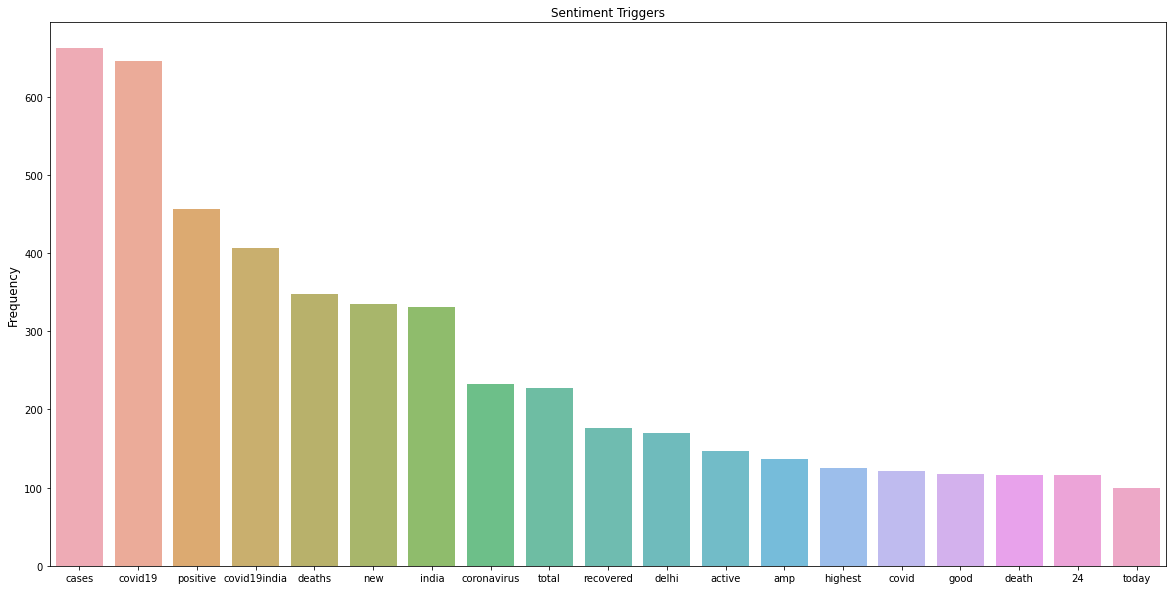

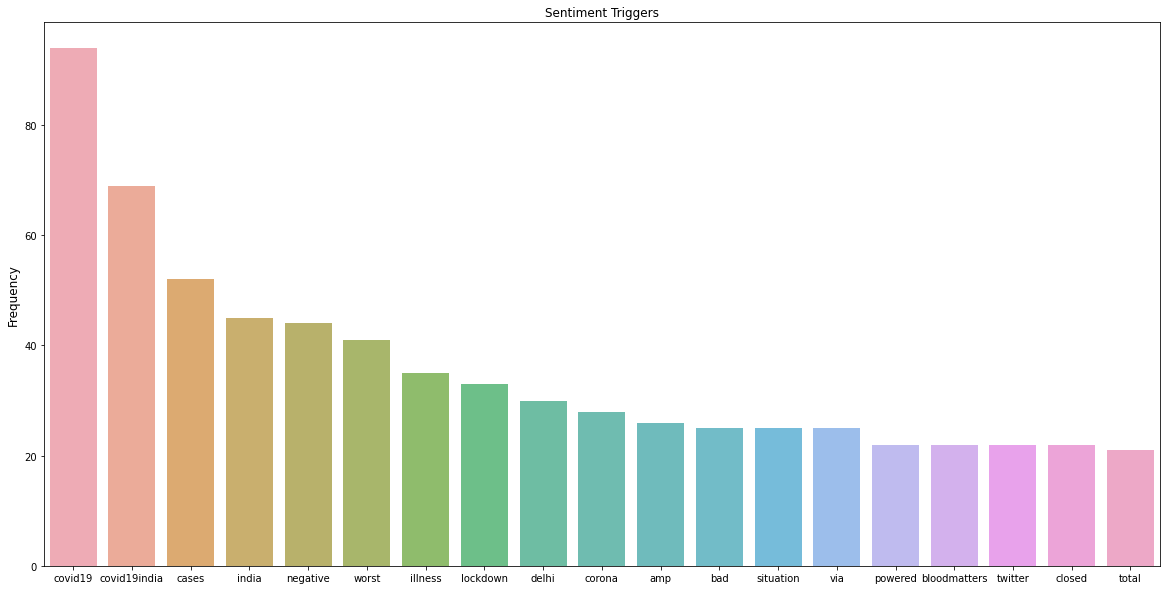

In [ ]:
ext_data = ext_data[ext_data['sentiment']!="neutral"]
df = ext_data.sentiment.value_counts()
for i in range(0,2):
    Analysis_Data = ext_data
    ext_data["extracted_tweet"]=ext_data["extracted_tweet"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
    Sentiment = Analysis_Data[Analysis_Data['sentiment'] == df.index[i]]#Creating the dataframe of having same sentiment
    Word_frequency = pd.Series(' '.join(Sentiment.extracted_tweet).split()).value_counts()[:20]#Calculating the words frequency
    plt.figure(figsize=(20,10))
    plt.ylabel("Frequency",fontsize=12)
    plt.title("Sentiment Triggers")
    sns.barplot(Word_frequency.index[1:],Word_frequency.values[1:],alpha=0.8)
    plt.savefig("/content/drive/My Drive/IBM_Hackathon_2020/Public_Sentiment_Data/Images/wordfrequency_"+df.index[i]+".png")


In [ ]:
import collections
ext_data_negative = ext_data[ext_data["sentiment"]=='negative']
ext_data_positive = ext_data[ext_data["sentiment"]=='positive']
bigrams = [b for l in ext_data_positive.extracted_tweet for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df_positive = pd.DataFrame(bigram_counts.most_common(60),
                             columns=['bigram', 'frequency'])
bigrams = [b for l in ext_data_negative.extracted_tweet for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df_negative = pd.DataFrame(bigram_counts.most_common(80),
                             columns=['bigram', 'frequency'])


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# Create network plot 
G=nx.grid_2d_graph(2,2)

pos = nx.fruchterman_reingold_layout(G,k=10,iterations=100)
fig,ax = plt.subplots(figsize=(50,30)) 
d = bigram_df_negative.set_index('bigram').T.to_dict('records')
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
pos = nx.fruchterman_reingold_layout(G,k=10,iterations=100) 
  
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=4,
                 edge_color='#e25a4b',
                 node_size=500,
                 title = "Negative Sentiment",
                 with_labels = False,
                 ax=ax)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,bbox=dict(facecolor='#ffcd94', alpha=0.4),
            horizontalalignment='center', fontsize=35)
plt.savefig("/content/drive/My Drive/IBM_Hackathon_2020/Public_Sentiment_Data/Images/ext_negative.png")   
fig,ax  = plt.subplots(figsize=(50,30))

d = bigram_df_positive.set_index('bigram').T.to_dict('records')
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
pos = nx.fruchterman_reingold_layout(G,k=10,iterations=100) 
  
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=4,
                 edge_color='#999894',
                 node_size=500,
                 with_labels = False,
                 title = "Positve Sentiment",
                 ax=ax)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,bbox=dict(facecolor='#7c99d0', alpha=0.4),
            horizontalalignment='center', fontsize=35)
plt.savefig("/content/drive/My Drive/IBM_Hackathon_2020/Public_Sentiment_Data/Images/ext_positive.png")     
plt.show()
    

In [ ]:
for i in range(len(bigram_df_positive.bigram)):
  bigram_df_positive.bigram[i] = list(bigram_df_positive.bigram[i])
  bigram_df_positive.bigram.to_csv("/content/drive/My Drive/hackathon/listbigram_positive.csv")
for i in range(len(bigram_df_negative.bigram)):
  bigram_df_negative.bigram[i] = list(bigram_df_negative.bigram[i])
  bigram_df_negative.bigram.to_csv("/content/drive/My Drive/hackathon/listbigram_negative.csv")  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



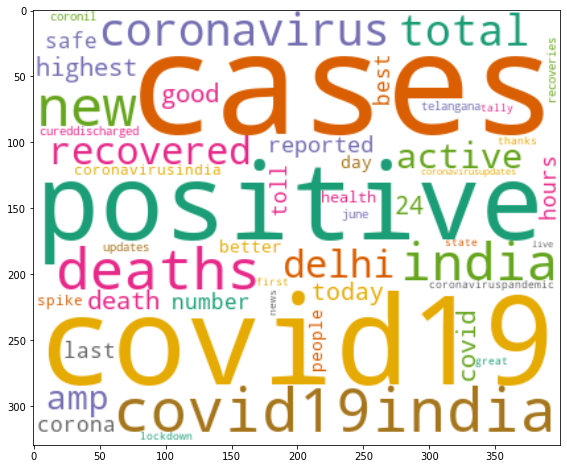

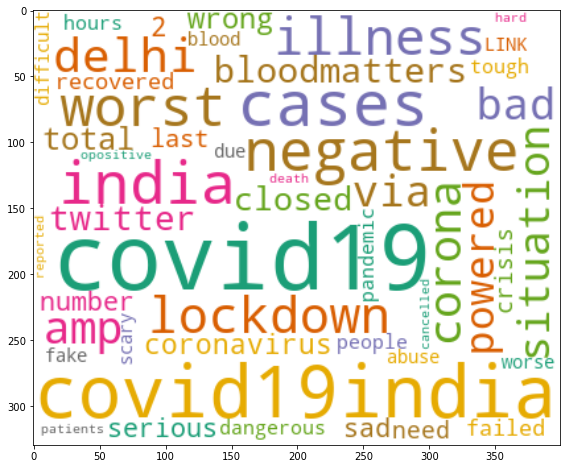

In [ ]:
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2",background_color='white', collocations=False).generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
for i in range(0,2):
    Analysis_Data = ext_data
    ext_data["extracted_tweet"]=ext_data["extracted_tweet"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
    Sentiment = Analysis_Data[Analysis_Data['sentiment'] == df.index[i]]#Creating the dataframe of having same sentiment
    Word_frequency = pd.Series(' '.join(Sentiment.extracted_tweet).split()).value_counts()[:50]#Calculating the words frequency
    generate_wordcloud(Word_frequency.sort_values(ascending=False)[1:],data.index[i])
    plt.savefig("/content/drive/My Drive/IBM_Hackathon_2020/Public_Sentiment_Data/Images/Wordcloud_" +df.index[i]+" .png")   
    

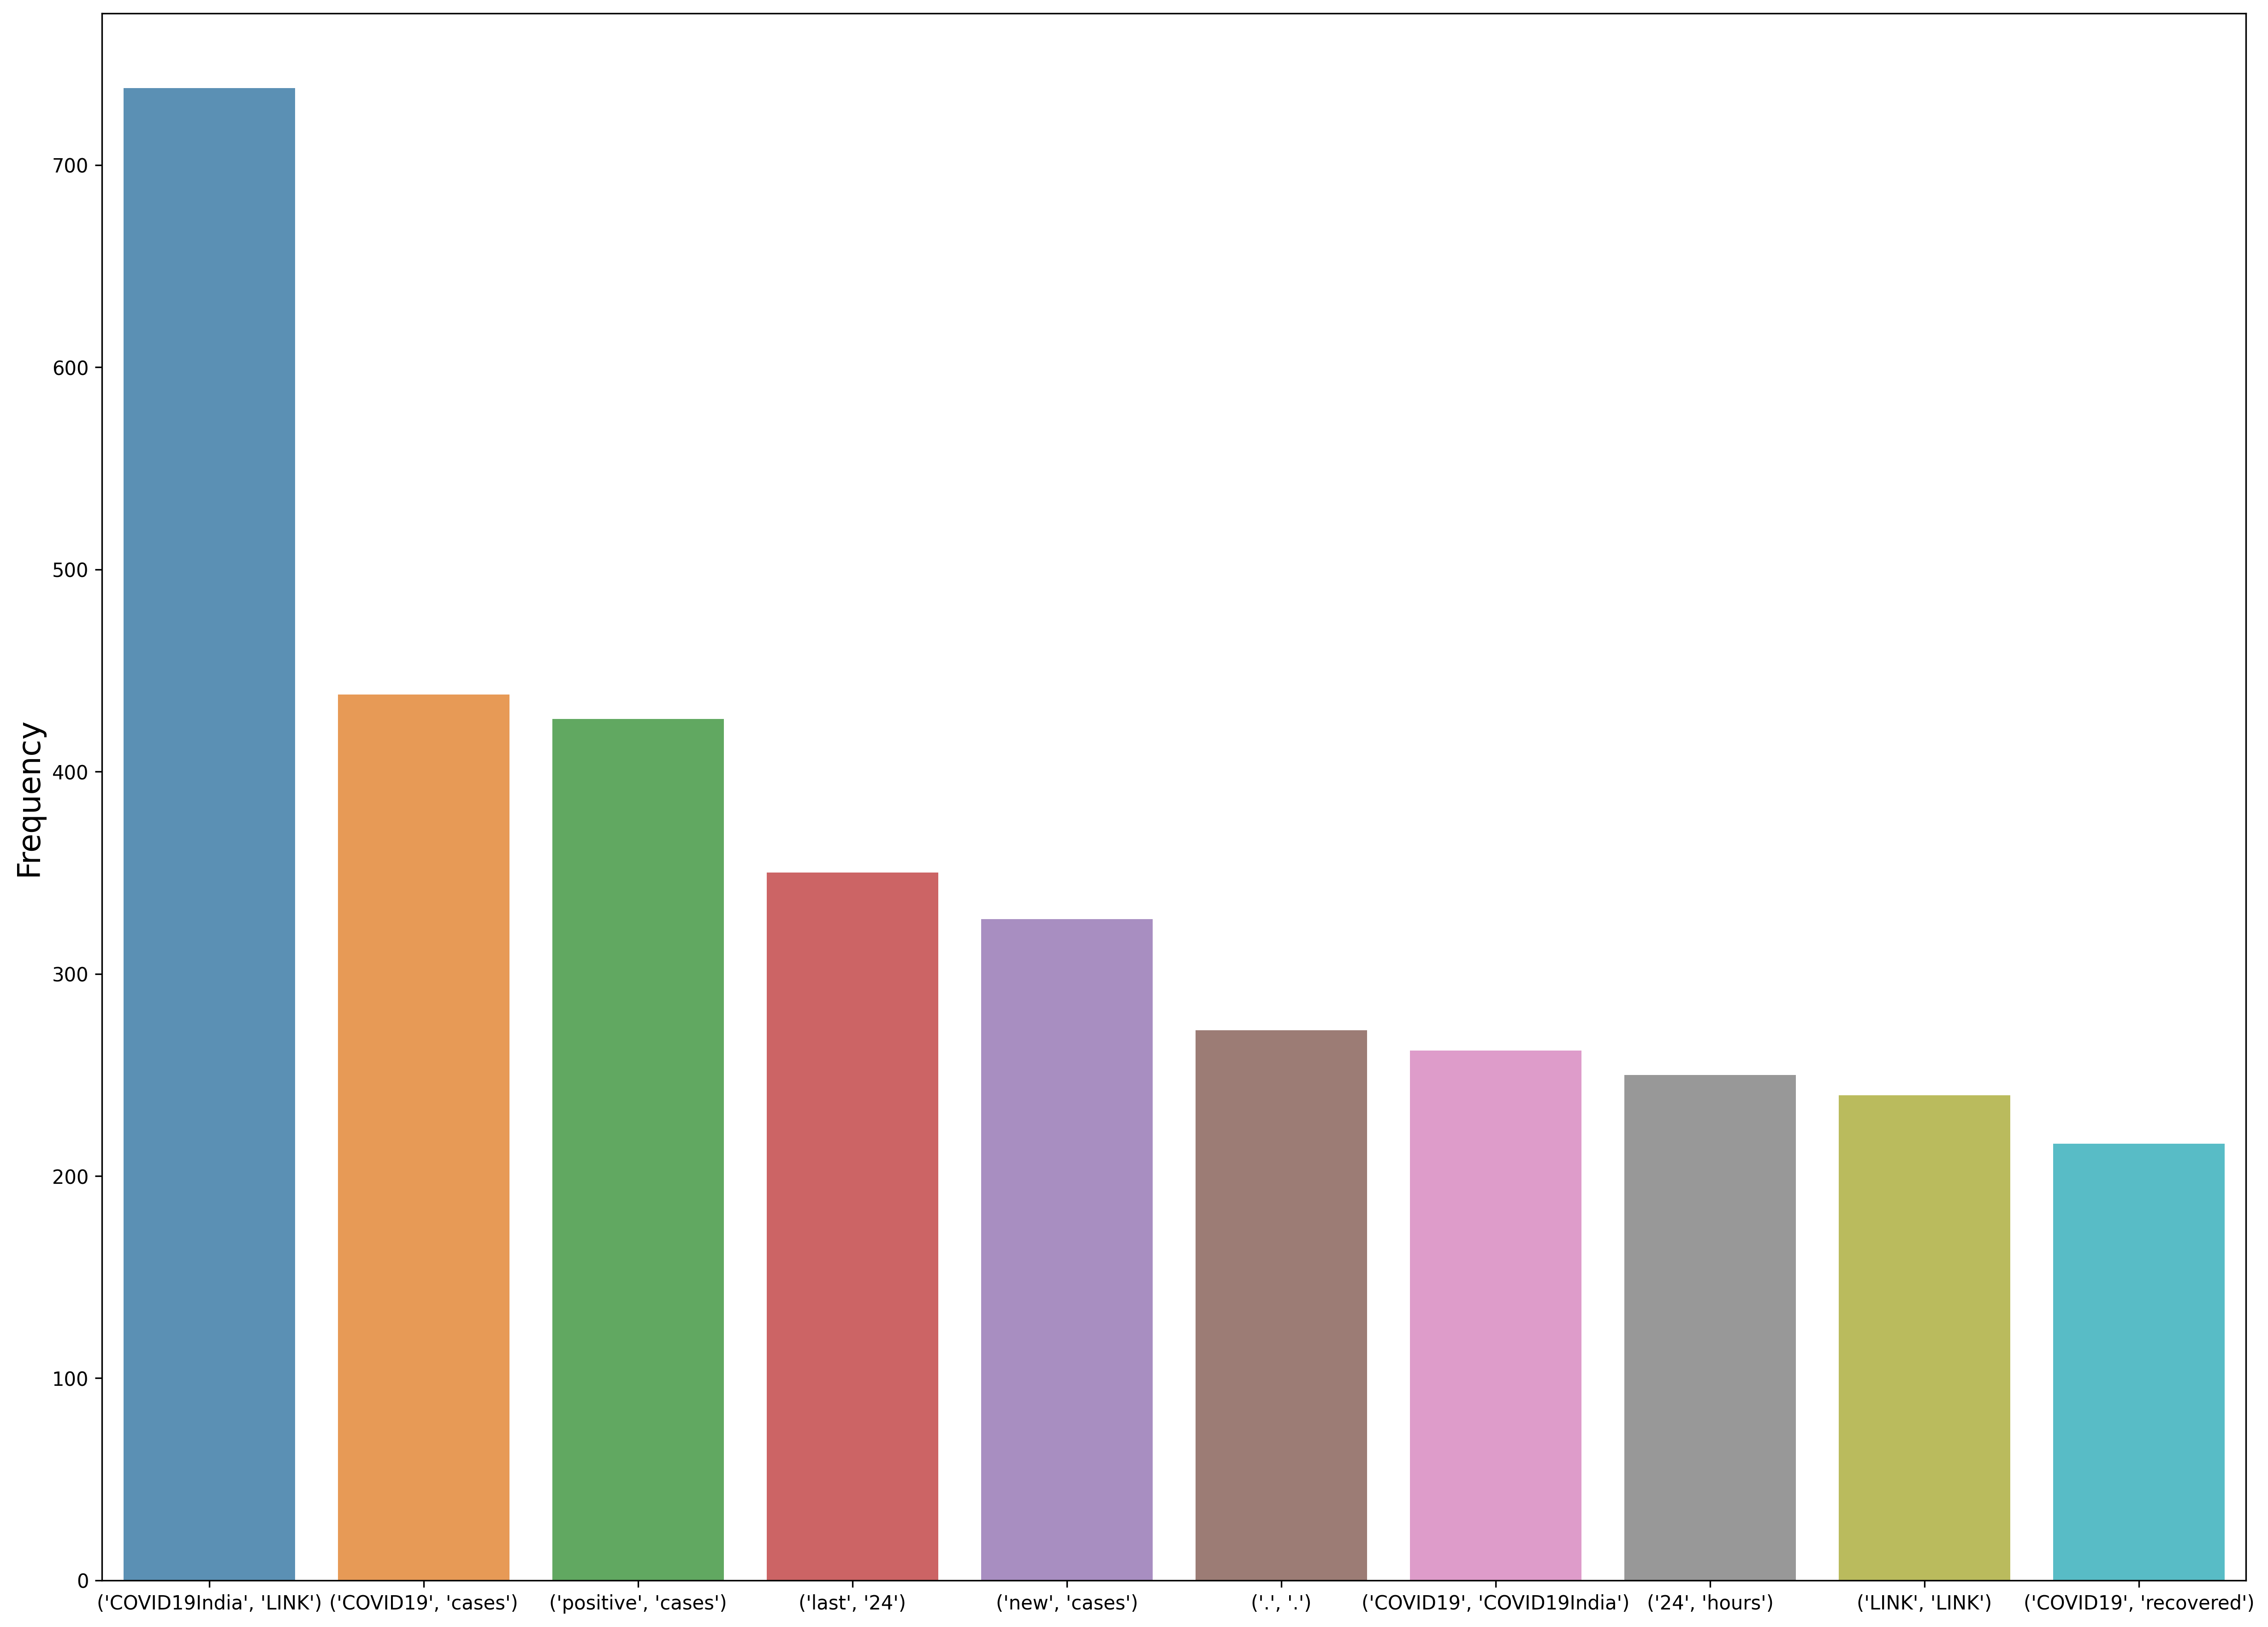

In [ ]:
 import collections
data["text"]=data["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
bigrams = [b for l in data.text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df = pd.DataFrame(bigram_counts.most_common(10),columns=['bigram', 'frequency'])
fig, ax = plt.subplots(1, 1, figsize = (20, 15), dpi=300)
sns.barplot(bigram_df.bigram,bigram_df.frequency,alpha=0.8)
plt.ylabel("Frequency",fontsize=16)
ax.set_xlabel('')
plt.savefig("/content/drive/My Drive/IBM_Hackathon_2020/Public_Sentiment_Data/Images/bigram_frequency.png")

In [ ]:
import collections
data["text"]=data["text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
bigrams = [b for l in data.text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df = pd.DataFrame(bigram_counts.most_common(200),columns=['bigram', 'frequency'])
bigram_data = bigram_df
bigram_data["word1"] = bigram_data["bigram"].apply(lambda x: x[0])
bigram_data["word2"] = bigram_data["bigram"].apply(lambda x: x[1])
bigram_data.drop(["bigram"],axis = 1,inplace = True)
bigram_data.rename({"frequency":"n"}, axis=1, inplace = True) 
bigram_data = bigram_data[["word1","word2","n"]]
bigram_data.to_csv("/content/drive/My Drive/IBM_Hackathon_2020/Public_Sentiment_Data/R_data.csv",index=False)

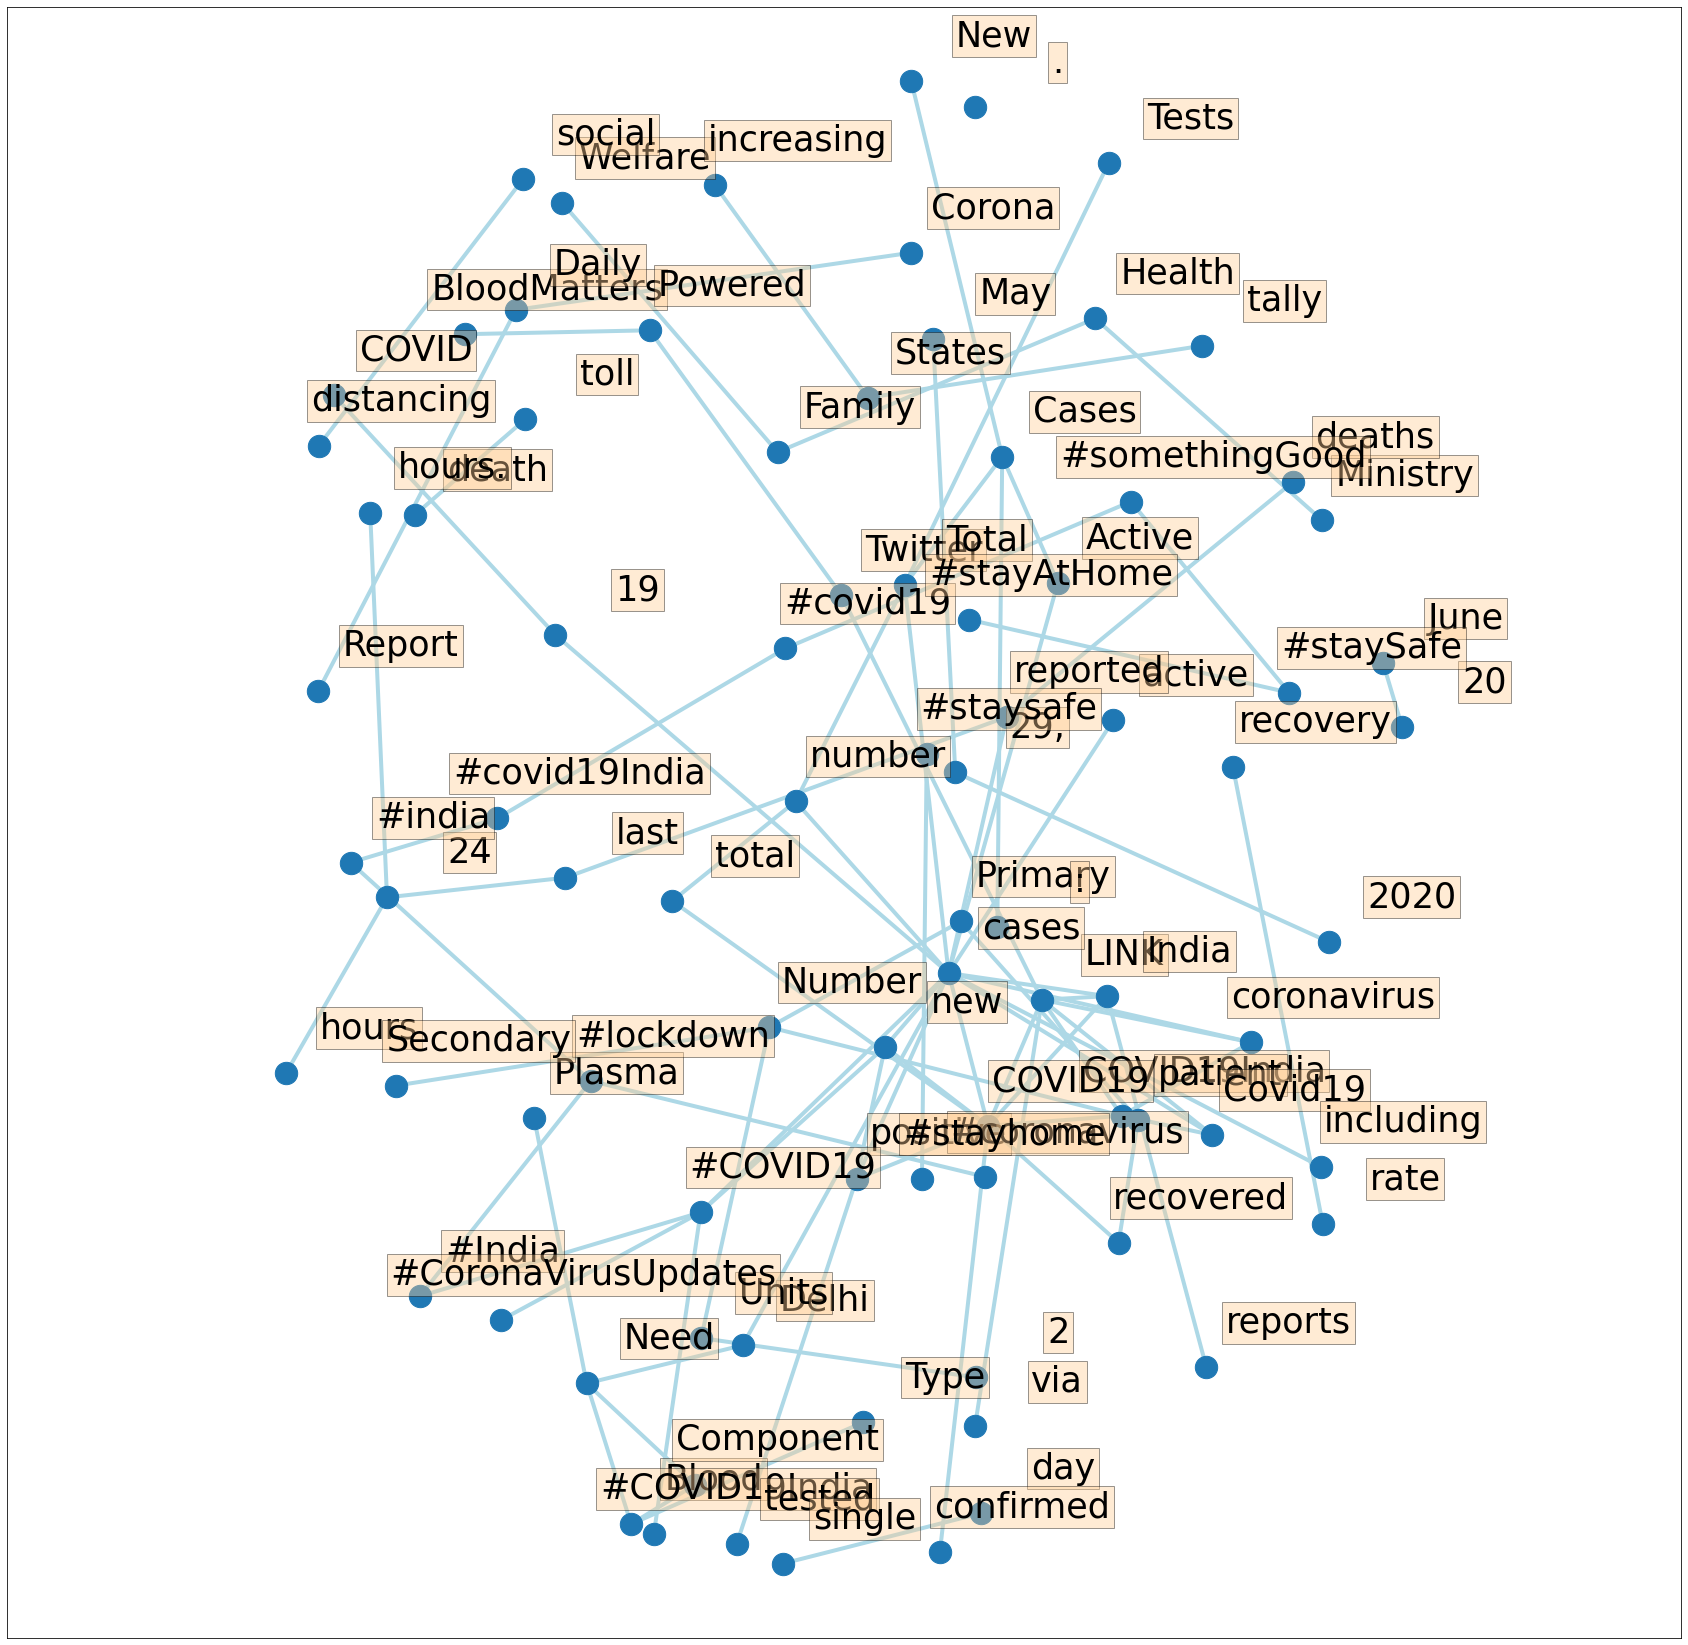

In [ ]:
import collections
bigrams = [b for l in data.text for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigram_counts = collections.Counter(bigrams)
bigram_df = pd.DataFrame(bigram_counts.most_common(100),
                             columns=['bigram', 'frequency'])
import networkx as nx
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

pos = nx.fruchterman_reingold_layout(G,k=10,iterations=100)
fig,ax = plt.subplots(figsize=(30,30))
# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=4,
                 edge_color='lightblue',
                 node_size=500,
                 with_labels = False,
                 ax=ax)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.25
plt.xlim(x_min - x_margin, x_max + x_margin)


# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,bbox=dict(facecolor='#ffcd94', alpha=0.4),
            horizontalalignment='center', fontsize=35)
plt.savefig('/content/drive/My Drive/IBM_Hackathon_2020/Public_Sentiment_Data/Images/network_1_python')
plt.show()   


In [ ]:
for i in range(len(bigram_df.bigram)):
 bigram_df.bigram[i] = list(bigram_df.bigram[i])
bigram_df.bigram.to_csv("/content/drive/My Drive/hackathon/listbigram.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px
fig = px.box(data, y="retweetcount",points="all")

fig.update_layout(
    yaxis_title="Retweet Count",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(data, y="sentiment",points="all")

fig.update_layout(
    
    yaxis_title="Sentiment",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [ ]:
hashtag_data = pd.DataFrame(columns=['hashtag','retweet_count'])
for i in range(len(data.hashtags)):
  text = data.hashtags[i]
  text = text.replace('[','')
  text = text.replace(']','')
  text = text.replace(',','')
  text = text.replace("'", "")
  x = text.split()
  for string in x:
    hashtag_data.loc[len(hashtag_data)] = [string, data.retweetcount[i]]

In [ ]:
hashtag_data = hashtag_data.groupby(['hashtag'],as_index = False).agg({'retweet_count': 'sum'})
hashtag_data.to_csv("/content/drive/My Drive/IBM_Hackathon_2020/Public_Sentiment_Data/hashtag.csv",index=False)
hashtag_data = hashtag_data[:16611]


In [ ]:
hashtag_data["retweet_count"] = hashtag_data.retweet_count[:10].astype("int64")
hashtag_data["hashtag"] = hashtag_data.hashtag[:10]

In [ ]:
hashtag_data = hashtag_data.sort_values(by = ["retweet_count"],ascending=False).head(20)

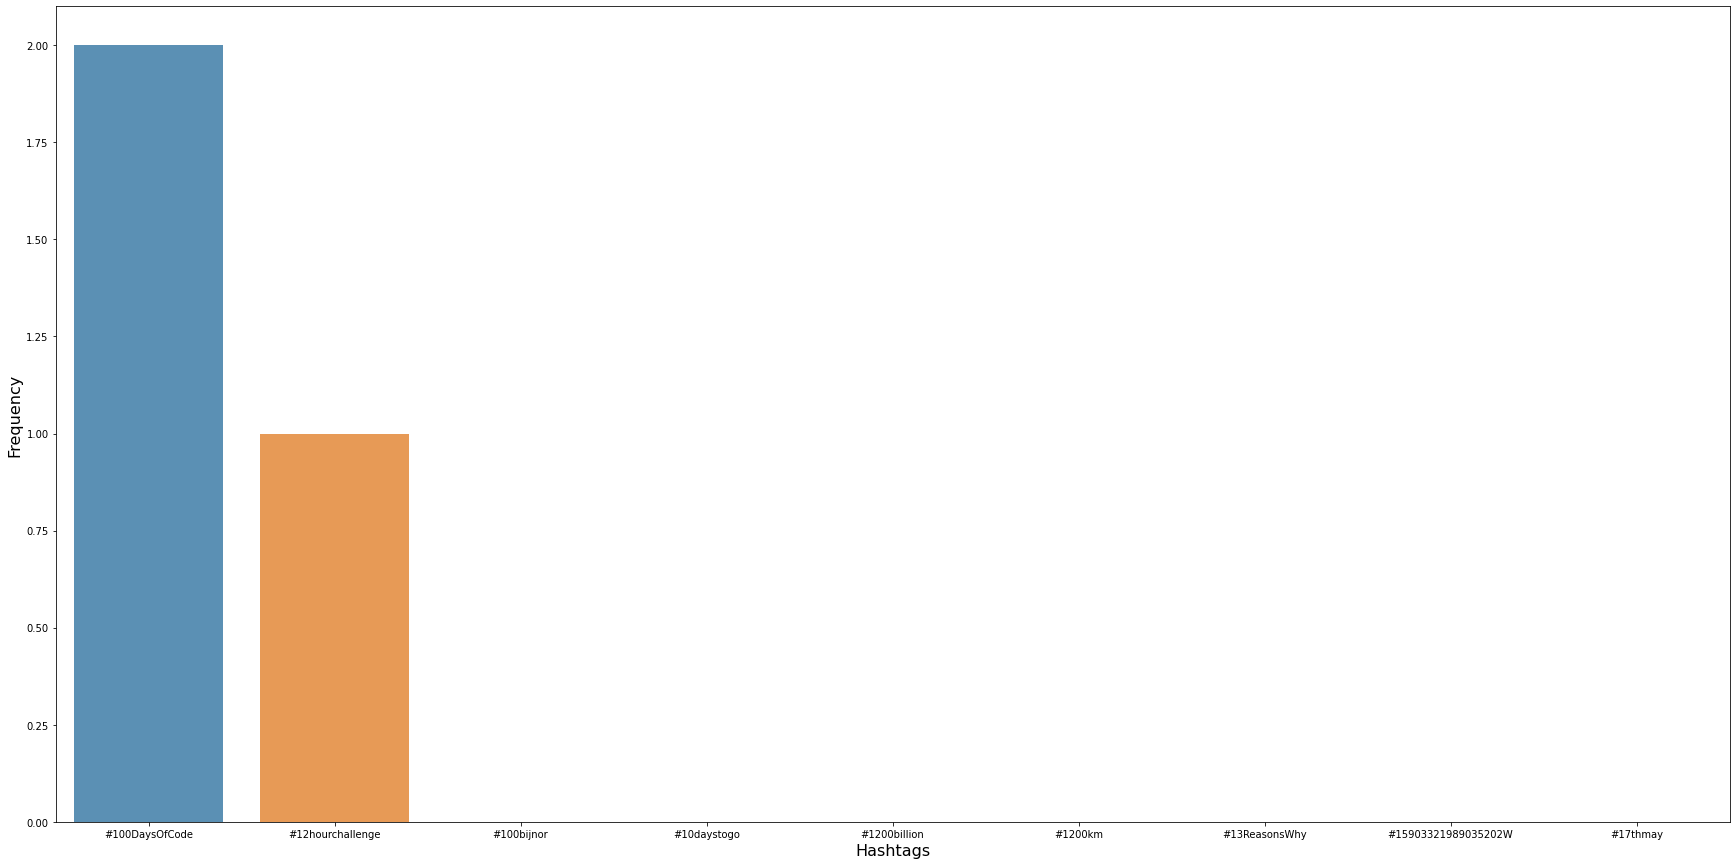

In [ ]:
fig = plt.figure(figsize=(30,15))
sns.barplot(hashtag_data.hashtag[1:10],hashtag_data.retweet_count[1:10],alpha=0.8)
plt.xlabel("Hashtags",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.savefig('/content/drive/My Drive/IBM_Hackathon_2020/Public_Sentiment_Data/Images/hashtag_frequency.png')